In [1]:
import matplotlib.pyplot as plt
import aplpy
#matplotlib.rc("font", size=18)
import soxs
import astropy.units as u
from astropy.coordinates import SkyCoord
import subprocess #for running scripts
import os


soxs : [WARNING  ] 2023-02-21 09:31:33,839 Setting 'soxs_data_dir' to /Users/ryan/Library/Caches/soxs for this session. Please update your configuration if you want it somewhere else.


In [2]:
model_string = "tbabs*(ztbabs*cabs*cutoffpl+const*cutoffpl+pexrav+apec+apec)" # A somewhat complicated model
galnh = 4.68e-2
z = 0.1106
galnh,1,z,1,1.8,300,1.e-3,0.005,1.8,300,1.e-3,1.8,300,-0.3,z,1,1,0.45,1.e-3,0.1,1.0,z,1.e-3,0.89,1.0,z,1.e-3 #"1.8,0.05,1.4,1.4,2.4,2.4",1.e-3

params = [galnh,1,z,1,1.8,300,1.e-3,0.005,1.8,300,1.e-3,1.8,300,-0.3,z,1,1,0.45,1.e-3,0.1,1.0,z,1.e-3,0.89,1.0,z,1.e-3]
emin = 0.1
emax = 30.0
nbins = 20000
spec1 = soxs.spectra.Spectrum.from_xspec_model(model_string, params, emin, emax, nbins)

model_string = "tbabs*(ztbabs*cabs*cutoffpl+const*cutoffpl+pexrav+apec+apec)" # A somewhat complicated model
params = [galnh,1,z,1,1.8,300,1.e-3,0.005,1.8,300,1.e-3,1.8,300,-0.3,z,1,1,0.45,1.e-3,0.1,1.0,z,1.e-3,0.89,1.0,z,1.e-3]
emin = 0.1
emax = 30.0
nbins = 20000
spec2 = soxs.spectra.Spectrum.from_xspec_model(model_string, params, emin, emax, nbins)

In [3]:
flux1 = 1.0e-13 # erg/s/cm**2
flux2 = 5.0e-14 # erg/s/cm**2
emin = 2.0 # keV
emax = 10.0 # keV
spec1.rescale_flux(flux1, emin=emin, emax=emax, flux_type="energy")
spec2.rescale_flux(flux2, emin=emin, emax=emax, flux_type="energy")

n_H = 0.04 # 10^20 atoms/cm^2
spec1.apply_foreground_absorption(n_H)
spec2.apply_foreground_absorption(n_H)


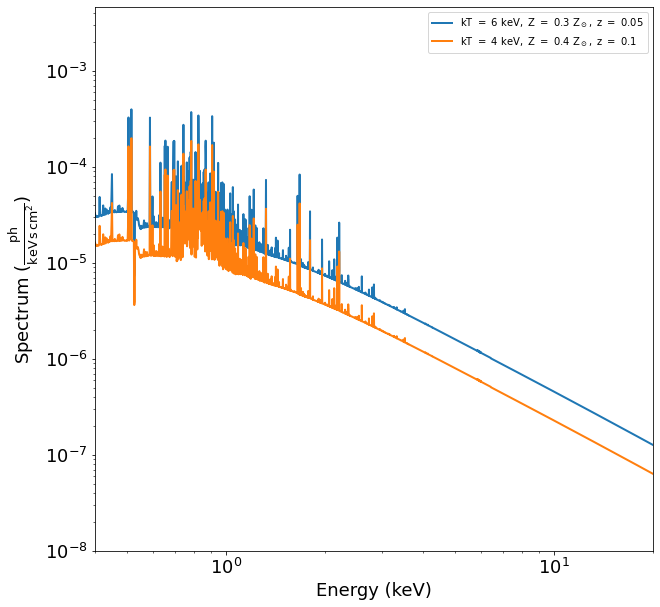

In [4]:
fig, ax = spec1.plot(xmin=0.4, xmax=20.0, ymin=10**-8, label="$\mathrm{kT\ =\ 6\ keV,\ Z\ =\ 0.3\ Z_\odot,\ z\ =\ 0.05}$")
spec2.plot(label="$\mathrm{kT\ =\ 4\ keV,\ Z\ =\ 0.4\ Z_\odot,\ z\ =\ 0.1}$",
           fig=fig, ax=ax)
ax.legend()

In [5]:
#from soxs import get_instrument_from_registry, add_instrument_to_registry
#hexphet = add_instrument_to_registry("HEXP_HET.json")


In [6]:
#new_hexp = get_instrument_from_registry("hexp_HETx2")
#new_hexp["name"] = "hexp_HETx2_abspathcheck" # Must change the name, otherwise an error will be thrown
#new_hexp["rmf"] = "/Users/ryan/Dropbox/GitHub/SOXS/HEXP_v03_rsp_files/HEXP_HET_v03.rmf" # Must change the name, otherwise an error will be thrown
#name = add_instrument_to_registry(new_hexp)

In [7]:
from soxs import PointSourceModel
from soxs import write_spectrum
from soxs import plot_spectrum

# Center of the field of view
ra0 = 30.0 # degrees
dec0 = 45.0 # degrees

# Create a list of RA and Dec offsets that we'll load into a function to generate a series of point sources \
# at varying separations
c0 = SkyCoord(ra0*u.deg, dec0*u.deg, frame='icrs')
c1 = SkyCoord(ra0*u.deg, dec0*u.deg, frame='icrs') 

sep=['50','40','30','20','15','10','5','0']
ras1 = [c1.ra,c1.ra,c1.ra,c1.ra,c1.ra,c1.ra,c1.ra,c1.ra]
decs1 = [c1.dec,c1.dec,c1.dec,c1.dec,c1.dec,c1.dec,c1.dec,c1.dec]
ras2 = []
decs2 = []
for i in sep:
    c2 = c0.directional_offset_by(90 * u.deg, int(i) * u.arcsec) 
    ras2.append(c2.ra)
    decs2.append(c2.dec)

print(ras2)
print(decs2)

#c2 = c0.directional_offset_by(90 * u.deg, -10.0 * u.arcsec) 
#RAsec = 0.25 / 60
#Decsec = 0.0166 / 60
#dra = 5 * RAsec
#ddec = 5 * Decsec

#c1 = SkyCoord(30*u.deg, 45*u.deg)
#c2 = SkyCoord(30*u.deg, 45.00027778*u.deg)
#print(c0.separation(c1).to("arcsec"))
#print(c0.separation(c2).to("arcsec"))
#print(c1.separation(c2).to("arcsec"))
#print(c2.ra/u.deg)
#print(c2.dec/u.deg)

#for i in ras2:
#    print(i/u.deg)
#print(ras2[0]/u.deg)


[<Longitude 30.01964185 deg>, <Longitude 30.01571348 deg>, <Longitude 30.01178511 deg>, <Longitude 30.00785674 deg>, <Longitude 30.00589256 deg>, <Longitude 30.00392837 deg>, <Longitude 30.00196419 deg>, <Longitude 30. deg>]
[<Latitude 44.99999832 deg>, <Latitude 44.99999892 deg>, <Latitude 44.99999939 deg>, <Latitude 44.99999973 deg>, <Latitude 44.99999985 deg>, <Latitude 44.99999993 deg>, <Latitude 44.99999998 deg>, <Latitude 45. deg>]


In [10]:
def sim_duals(ras1,decs1,ras2,decs2,sep,t_exp,area):
    for i,j,x,y,k in zip(ras1,decs1,ras2,decs2,sep):
        # Making directory for the particular separation in question
        if not os.path.exists('Sep_'+str(k)+'as/'):
            os.mkdir('Sep_'+str(k)+'as/')
        os.chdir('Sep_'+str(k)+'as/')
        print('Now working in directory: ' + os.getcwd())
        #Now creating the spatial models
        pt_src1 = PointSourceModel(i, j)
        pt_src2 = PointSourceModel(x, y)
        #sep = str(i[::-1]).replace('.', 'p')
        # Generating the simput photon distributions convolved with a spatial model
        sou1_phlist_k = soxs.SimputPhotonList.from_models("AGN 1", spec1, pt_src1, t_exp, area)
        sou2_phlist_k = soxs.SimputPhotonList.from_models("AGN 2", spec2, pt_src2, t_exp, area)
        
        # Create the SIMPUT catalog "sim_cat" from the photon lists "cluster1" and "cluster2"
        sim_cat = soxs.SimputCatalog.from_source("dualagn_"+str(k)+"_hexphet_simput.fits", sou1_phlist_k, overwrite=True)
        sim_cat.append(sou2_phlist_k)
        
        ###### Now generating source region apertures for the sources
        rad = 10/3600 # NOTE  THE STRING FORMAT BELOW FOR THE DS9 REGION USES DEGREES FOR THE UNITS OF RADIUS; I CANNOT SEEM TO GET IT TO UNDERSTAND ARCSECONDS UNITS SO I'M JUST PUTTING ARCSECONDS IN UNITS OF DEGREES
        #rad=10
        str1 = 'circle('+str(i/u.deg)+','+str(j/u.deg)+','+str(rad)+')' #+'''\\''' + '\"' 
        str2 = 'circle('+str(x/u.deg)+','+str(y/u.deg)+','+str(rad)+')' #+'''\\''' + '\"' 
        with open("cir1_"+str(k)+".reg", 'w') as reg1:
            reg1.write(str1)
        with open("cir2_"+str(k)+".reg", 'w') as reg2:
            reg2.write(str2)
        # Here we are interfacing with SIXTE with a bash script to generate event files, science images, and spectra
        exp = 50000 # Add your choice of exposure time here
        #%run sixte_duals_simulations.sh sep ras1 decs1 exp # Running the sixte simulations now
        #spex = subprocess.run('/Users/ryan/PIMMS/pimms', input=input)
        #repro = subprocess.run(['/Users/ryan/Dropbox/GitHub/XMM-Processing/spex_xmm', arg1, arg2, arg3, arg4, arg5])
        sim = subprocess.run('/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh '+ str(k) + ' ' + str(i/u.deg) + ' ' + str(j/u.deg) + ' ' + str(exp), shell=True)
        print(sim)
            # This takes in arguments for the separation, ra1 and dec1, and the exposure time choice
            # These are needed for naming conventions, assignment of the observation pointing, and the exposure time
        os.chdir('../')


        #####
        ###### Now writing energy filtered and spatially filtered event files (as if we are extracting the spectra)
        #####soxs.filter_events("dualagn_hexphet_"+str(k)+"_evt.fits", "agn1_hexphet_"+str(k)+"_extr.fits", region=reg1, emin=2.0, emax=80.0, format='ds9', overwrite=True)
        #####soxs.filter_events("dualagn_hexphet_"+str(k)+"_evt.fits", "agn2_hexphet_"+str(k)+"_extr.fits", region=reg2, emin=2.0, emax=80.0, format='ds9', overwrite=True)
        ######"cir1_"+str(k)+".reg"
        ######"cir2_"+str(k)+".reg"
        #####
        ###### Now binning up the events from the energy+spatially filtered event files to generate spectra
        #####write_spectrum("agn1_hexphet_"+str(k)+"_extr.fits", "agn1_hexphet_"+str(k)+".pha", overwrite=True)
        #####write_spectrum("agn2_hexphet_"+str(k)+"_extr.fits", "agn2_hexphet_"+str(k)+".pha", overwrite=True)
        

In [11]:
#os.chdir('../')
#os.getcwd()

In [12]:
sim_duals(ras1,decs1,ras2,decs2,sep,(500.0, "ks"),(3.0, "m**2"))


soxs : [INFO     ] 2023-02-21 09:32:43,667 Creating 943590 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:32:43,824 Finished creating energies.


Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_50as


soxs : [INFO     ] 2023-02-21 09:32:43,896 Creating 471419 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:32:43,963 Finished creating energies.
soxs : [INFO     ] 2023-02-21 09:32:44,101 Appending source 'AGN 1' to dualagn_50_hexphet_simput.fits.
soxs : [INFO     ] 2023-02-21 09:32:44,409 Appending source 'AGN 2' to dualagn_50_hexphet_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_50_hexphet_simput.fits' ...
try to load all spectra ('dualagn_50_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_50_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_50_hexphet_simput.fits' ...
try to load all spectra ('dualagn_50_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_50_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to p

soxs : [INFO     ] 2023-02-21 09:33:02,994 Creating 944547 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:33:03,136 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 50 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_40as


soxs : [INFO     ] 2023-02-21 09:33:03,209 Creating 471541 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:33:03,277 Finished creating energies.
soxs : [INFO     ] 2023-02-21 09:33:03,396 Appending source 'AGN 1' to dualagn_40_hexphet_simput.fits.
soxs : [INFO     ] 2023-02-21 09:33:03,670 Appending source 'AGN 2' to dualagn_40_hexphet_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_40_hexphet_simput.fits' ...
try to load all spectra ('dualagn_40_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_40_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_40_hexphet_simput.fits' ...
try to load all spectra ('dualagn_40_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_40_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to p

soxs : [INFO     ] 2023-02-21 09:33:21,188 Creating 945998 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:33:21,332 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 40 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_30as


soxs : [INFO     ] 2023-02-21 09:33:21,410 Creating 472041 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:33:21,479 Finished creating energies.
soxs : [INFO     ] 2023-02-21 09:33:21,769 Appending source 'AGN 1' to dualagn_30_hexphet_simput.fits.
soxs : [INFO     ] 2023-02-21 09:33:22,085 Appending source 'AGN 2' to dualagn_30_hexphet_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_30_hexphet_simput.fits' ...
try to load all spectra ('dualagn_30_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_30_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_30_hexphet_simput.fits' ...
try to load all spectra ('dualagn_30_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_30_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to p

soxs : [INFO     ] 2023-02-21 09:33:38,541 Creating 946499 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:33:38,689 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 30 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_20as


soxs : [INFO     ] 2023-02-21 09:33:38,805 Creating 471642 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:33:38,883 Finished creating energies.
soxs : [INFO     ] 2023-02-21 09:33:39,009 Appending source 'AGN 1' to dualagn_20_hexphet_simput.fits.
soxs : [INFO     ] 2023-02-21 09:33:39,279 Appending source 'AGN 2' to dualagn_20_hexphet_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_20_hexphet_simput.fits' ...
try to load all spectra ('dualagn_20_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_20_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_20_hexphet_simput.fits' ...
try to load all spectra ('dualagn_20_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_20_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to p

soxs : [INFO     ] 2023-02-21 09:33:56,405 Creating 944724 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:33:56,543 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 20 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_15as


soxs : [INFO     ] 2023-02-21 09:33:56,620 Creating 471105 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:33:56,696 Finished creating energies.
soxs : [INFO     ] 2023-02-21 09:33:56,818 Appending source 'AGN 1' to dualagn_15_hexphet_simput.fits.
soxs : [INFO     ] 2023-02-21 09:33:57,171 Appending source 'AGN 2' to dualagn_15_hexphet_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_15_hexphet_simput.fits' ...
try to load all spectra ('dualagn_15_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_15_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_15_hexphet_simput.fits' ...
try to load all spectra ('dualagn_15_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_15_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to p

soxs : [INFO     ] 2023-02-21 09:34:14,156 Creating 944883 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:34:14,299 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 15 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_10as


soxs : [INFO     ] 2023-02-21 09:34:14,380 Creating 472952 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:34:14,447 Finished creating energies.
soxs : [INFO     ] 2023-02-21 09:34:14,570 Appending source 'AGN 1' to dualagn_10_hexphet_simput.fits.
soxs : [INFO     ] 2023-02-21 09:34:14,829 Appending source 'AGN 2' to dualagn_10_hexphet_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_10_hexphet_simput.fits' ...
try to load all spectra ('dualagn_10_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_10_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_10_hexphet_simput.fits' ...
try to load all spectra ('dualagn_10_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_10_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to p

soxs : [INFO     ] 2023-02-21 09:34:33,690 Creating 945380 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:34:33,834 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 10 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_5as


soxs : [INFO     ] 2023-02-21 09:34:33,909 Creating 472809 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:34:33,976 Finished creating energies.
soxs : [INFO     ] 2023-02-21 09:34:34,105 Appending source 'AGN 1' to dualagn_5_hexphet_simput.fits.
soxs : [INFO     ] 2023-02-21 09:34:34,363 Appending source 'AGN 2' to dualagn_5_hexphet_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_5_hexphet_simput.fits' ...
try to load all spectra ('dualagn_5_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_5_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_5_hexphet_simput.fits' ...
try to load all spectra ('dualagn_5_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_5_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to pattern

soxs : [INFO     ] 2023-02-21 09:34:50,953 Creating 945529 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:34:51,110 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 5 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_0as


soxs : [INFO     ] 2023-02-21 09:34:51,183 Creating 471826 energies from this spectrum.
soxs : [INFO     ] 2023-02-21 09:34:51,250 Finished creating energies.
soxs : [INFO     ] 2023-02-21 09:34:51,380 Appending source 'AGN 1' to dualagn_0_hexphet_simput.fits.
soxs : [INFO     ] 2023-02-21 09:34:51,664 Appending source 'AGN 2' to dualagn_0_hexphet_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_0_hexphet_simput.fits' ...
try to load all spectra ('dualagn_0_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_0_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_0_hexphet_simput.fits' ...
try to load all spectra ('dualagn_0_hexphet_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_0_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to pattern

In [2]:
#hexpcheck = get_instrument_from_registry("hexp_HETx2_abspathcheck")
#
#for key, values in hexpcheck.items():
#    print(key, " : ", values)

In [3]:
#soxs.show_instrument_registry()


In [114]:
def simxim(image,ang,instr,band,nrow,ncol,index):
    vminx, vmaxx = 0.1, 3.0   # For the X-ray image
    width, height = 2./60., 2./60.
    ra, dec = 30.0, 45.0
    scl = 10
    f1 = aplpy.FITSFigure(image, downsample=False, figure = fig, subplot=(nrow,ncol,index))
    f1.show_colorscale(vmin=vminx, vmax=vmaxx, cmap='viridis', stretch='log', smooth=3, kernel='gauss') #smooth=3, kernel='gauss', 
    f1.recenter(ra, dec, width=width, height=height)
    #f1.show_circles(ra, dec, (45/(60*60)), color='white', linestyle='--', linewidth=2)
    f1.add_scalebar(scl/(60*60.))
    f1.scalebar.set_label('%s"' % scl)
    f1.scalebar.set_color('white')
    f1.scalebar.set_font_size(22)
    f1.ticks.hide()
    f1.tick_labels.hide()
    f1.axis_labels.hide()
    f1.frame.set_color('white')
    f1.add_label(0.15, 0.92, 'Sep='+str(ang)+u'\u2033', relative=True, size=22, color='white')
    f1.add_label(0.2, 0.07, band, relative=True, size=22, color='white')
    f1.add_label(0.8, 0.92, instr, relative=True, size=24, color='white')
    

In [115]:
#def simspec1(pha,nrow,ncol,index):
#    plot_spectrum(pha, xmin=2.0, xmax=80.0, xscale = 'log', c='tab:blue', yscale='log', ax = fig.add_subplot(nrow,ncol,index))
#def simspec2(pha,nrow,ncol,index):
#    plot_spectrum(pha, xmin=2.0, xmax=80.0, xscale = 'log', c='tab:orange', yscale='log', ax = fig.add_subplot(nrow,ncol,index))



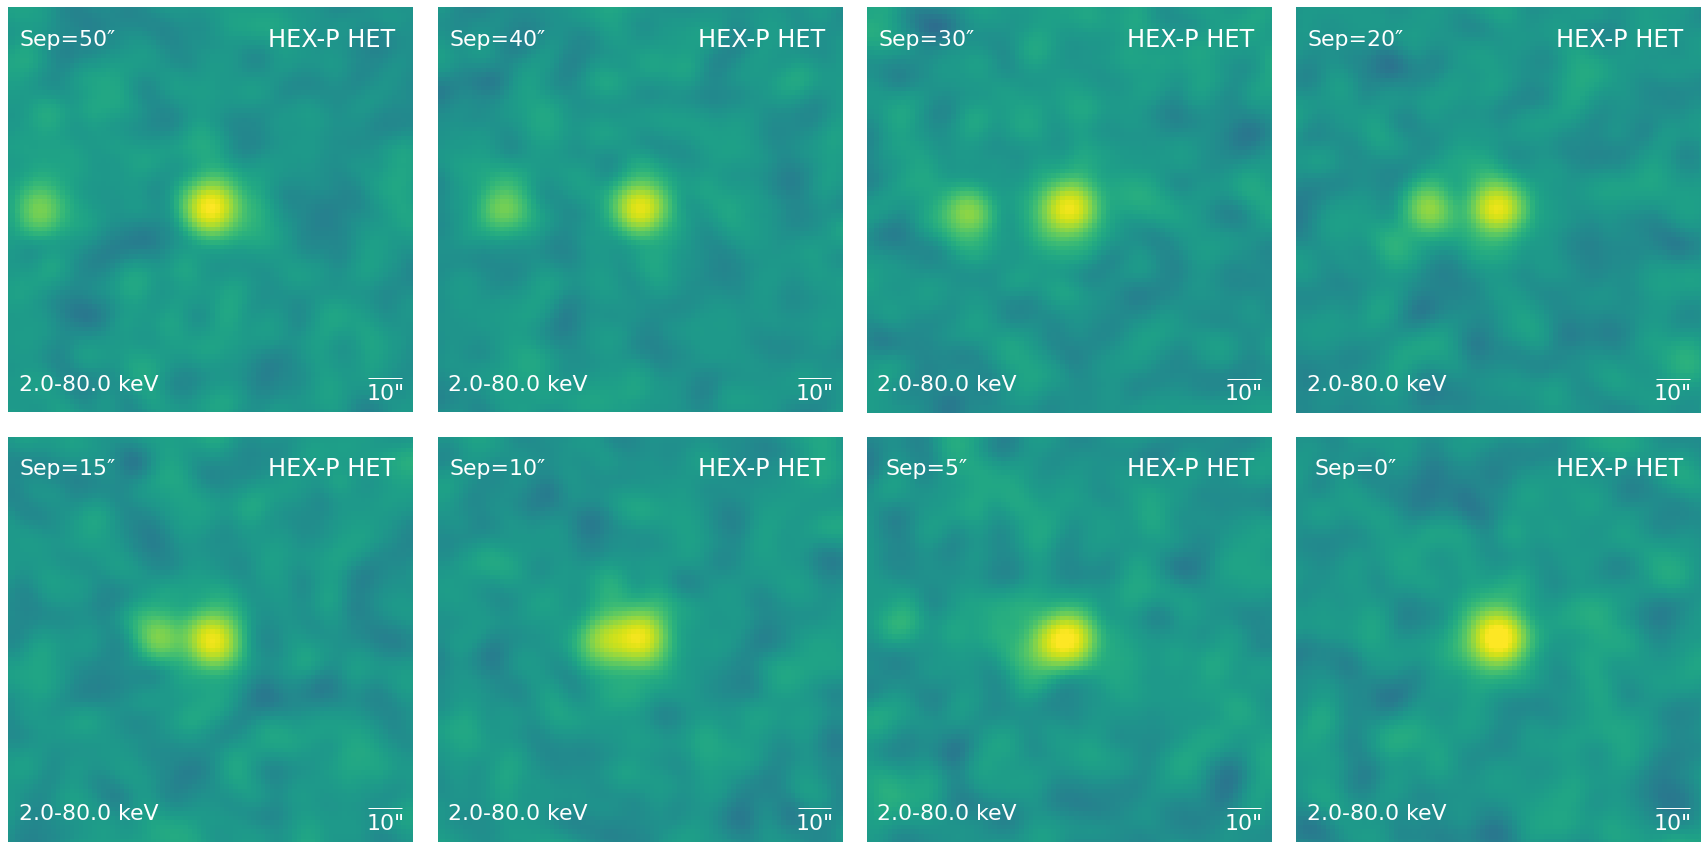

In [121]:
fig = plt.figure(figsize=(24,24))

simxim('sixtesim_50_img50ks.fits', 50, "HEX-P HET", "2.0-80.0 keV", 4, 4, 1)
simxim('sixtesim_40_img50ks.fits', 40, "HEX-P HET", "2.0-80.0 keV", 4, 4, 2)
simxim('sixtesim_30_img50ks.fits', 30, "HEX-P HET", "2.0-80.0 keV", 4, 4, 3)
simxim('sixtesim_20_img50ks.fits', 20, "HEX-P HET", "2.0-80.0 keV", 4, 4, 4)
simxim('sixtesim_15_img50ks.fits', 15, "HEX-P HET", "2.0-80.0 keV", 4, 4, 5)
simxim('sixtesim_10_img50ks.fits', 10, "HEX-P HET", "2.0-80.0 keV", 4, 4, 6)
simxim('sixtesim_5_img50ks.fits',   5, "HEX-P HET", "2.0-80.0 keV", 4, 4, 7)
simxim('sixtesim_0_img50ks.fits',   0, "HEX-P HET", "2.0-80.0 keV", 4, 4, 8)

plt.tight_layout()
plt.savefig('imaging_grid_smoothed.png', dpi=150)

plt.show()


In [6]:
from soxs import PointSourceModel
# Center of the field of view
ra0 = 30.0 # degrees
dec0 = 45.0 # degrees

# Space the clusters roughly a few arcminutes apart on the sky.
# They're at different redshifts, so one is behind the other.
dx = 2.0/(60.0) # original units of degrees, but need to convert to arcsecs and then put that in decimal degrees version
# 1 arcmin change in RA in decimal degrees is 0.25
# 1 arcmin change in Dec in decimal degrees is 0.0166rep, or 1/60

ra1 = ra0 - (0.25/6)
dec1 = dec0 - 0.0166/6
ra2 = ra0 + (0.25/6)
dec2 = dec0 + 0.0166/6

#Now creating the spatial models
pt_src1 = PointSourceModel(ra1, dec1)
pt_src2 = PointSourceModel(ra2, dec2)


In [7]:
t_exp = (500.0, "ks")
area = (3.0, "m**2")
sou1_phlist1 = soxs.SimputPhotonList.from_models("AGN 1", spec1, pt_src1, t_exp, area)
sou2_phlist2 = soxs.SimputPhotonList.from_models("AGN 2", spec2, pt_src2, t_exp, area)



soxs : [INFO     ] 2022-11-01 01:22:52,789 Creating 944961 energies from this spectrum.
soxs : [INFO     ] 2022-11-01 01:22:52,945 Finished creating energies.
soxs : [INFO     ] 2022-11-01 01:22:53,017 Creating 471694 energies from this spectrum.
soxs : [INFO     ] 2022-11-01 01:22:53,089 Finished creating energies.


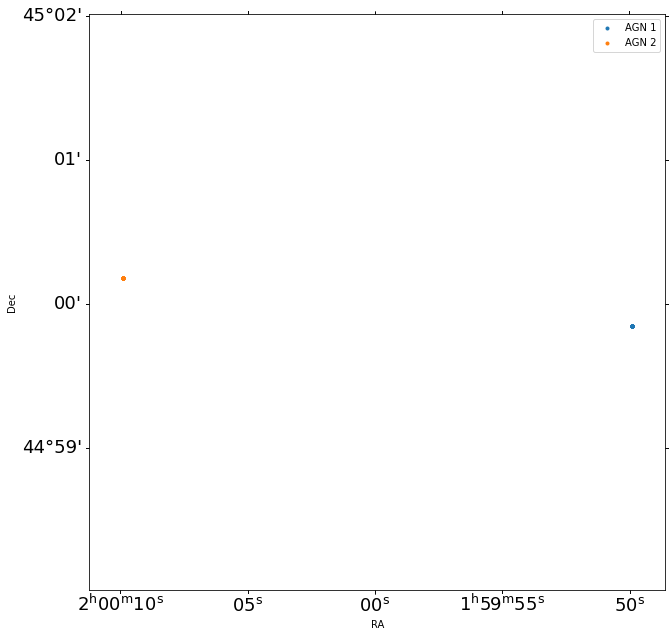

In [31]:
fig, ax = sou1_phlist1.plot([30.0, 45.0], 4.0, marker='.', stride=10, label="AGN 1")
sou2_phlist2.plot([30.0, 45.0], 4.0, marker='.', stride=10, fig=fig, ax=ax, label="AGN 2")
ax.legend()



In [9]:
# Create the SIMPUT catalog "sim_cat" from the photon lists "cluster1" and "cluster2"
sim_cat = soxs.SimputCatalog.from_source("agn_test_simput.fits", sou1_phlist1, overwrite=True)
sim_cat.append(sou2_phlist2)



soxs : [INFO     ] 2022-11-01 01:22:54,478 Appending this source to agn_test_simput.fits.
soxs : [INFO     ] 2022-11-01 01:22:54,837 Appending this source to agn_test_simput.fits.


In [10]:
from soxs import get_instrument_from_registry, add_instrument_to_registry
hexphet = add_instrument_to_registry("HEXP_HET.json")


soxs : [WARNING  ] 2022-11-01 01:22:54,937 Instrument specifications must now include an 'imaging' item, which determines whether or not this instrument specification supports imaging. Default is True.
soxs : [WARNING  ] 2022-11-01 01:22:54,938 Instrument specifications must now include an 'grating' item, which determines whether or not this instrument specification corresponds to a gratings instrument. Default is False.


In [14]:
soxs.instrument_simulator("agn_test_simput.fits", "evt.fits", (50.0, "ks"), "hexp_HETx2", [30., 45.], \
                          ptsrc_bkgnd=False, instr_bkgnd=False, foreground=False, overwrite=True)



soxs : [INFO     ] 2022-11-01 01:27:39,796 Making observation of source in evt.fits.
soxs : [INFO     ] 2022-11-01 01:27:40,243 Detecting events from source AGN 1
soxs : [INFO     ] 2022-11-01 01:27:40,244 Applying energy-dependent effective area from HEXP_HET_v03_x2.arf.
soxs : [INFO     ] 2022-11-01 01:27:40,292 580 events detected.
soxs : [INFO     ] 2022-11-01 01:27:40,297 Pixeling events.
soxs : [INFO     ] 2022-11-01 01:27:40,300 Scattering events with a gaussian-based PSF.
soxs : [INFO     ] 2022-11-01 01:27:40,304 0 events were rejected because they do not fall on any CCD.
soxs : [INFO     ] 2022-11-01 01:27:40,375 Detecting events from source AGN 2
soxs : [INFO     ] 2022-11-01 01:27:40,376 Applying energy-dependent effective area from HEXP_HET_v03_x2.arf.
soxs : [INFO     ] 2022-11-01 01:27:40,404 286 events detected.
soxs : [INFO     ] 2022-11-01 01:27:40,406 Pixeling events.
soxs : [INFO     ] 2022-11-01 01:27:40,408 Scattering events with a gaussian-based PSF.
soxs : [INFO

Scattering energies :   0%|          | 0/866 [00:00<?, ?it/s]

soxs : [INFO     ] 2022-11-01 01:27:41,196 No backgrounds will be added to this observation.
soxs : [INFO     ] 2022-11-01 01:27:41,197 Writing events to file evt.fits.
soxs : [INFO     ] 2022-11-01 01:27:41,279 Observation complete.


In [22]:
soxs.write_image("evt.fits", "agn_img.fits", emin=2.0, emax=80.0, overwrite=True)



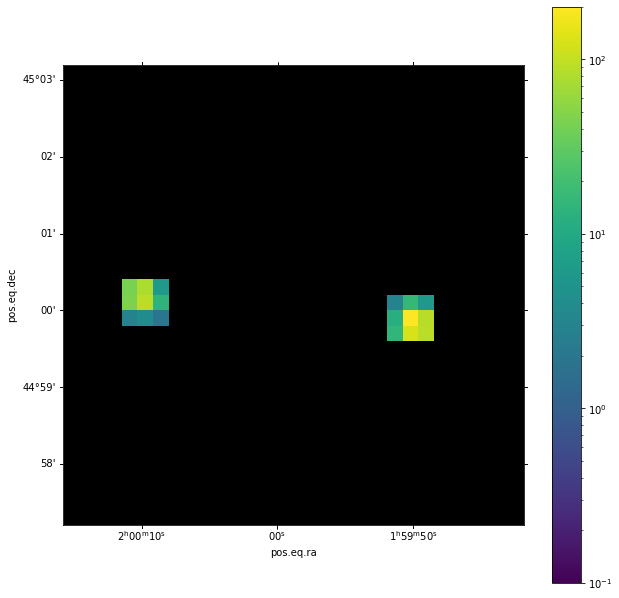

In [26]:
fig, ax = soxs.plot_image("agn_img.fits", stretch='log', cmap='viridis', vmin=0.1,
                          vmax=200.0, width=0.1)

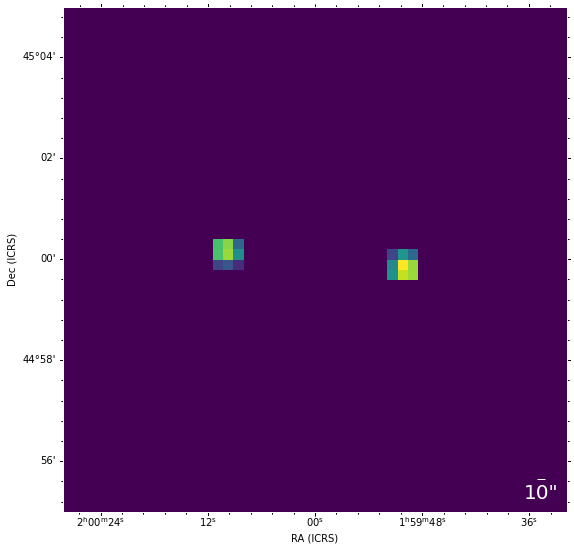

In [33]:
fig = plt.figure(figsize=(8,8))

Xmap = 'viridis'              # colormap for X-ray image
vmin1x, vmax1x = 1, 200.   # For the X-ray image
width, height = 10/60., 10./60.
#ra, dec = ra, dec
scl = 10 
#label=name
#fpm = fpm
X1 = "agn_img.fits"
f1 = aplpy.FITSFigure(X1, downsample=False, figure = fig)
f1.show_colorscale(vmin=vmin1x, vmax=vmax1x, cmap=Xmap, stretch='log') #smooth=3, kernel='gauss', 
f1.recenter(30, 45, width=width, height=height)
#f1.show_circles(ra, dec, (45/(60*60)), color='white', linestyle='--', linewidth=2)
f1.add_scalebar(scl/(60*60.))
f1.scalebar.set_label('%s"' % scl)
f1.scalebar.set_color('white')
f1.scalebar.set_font_size(20)
#f1.ticks.hide()
#f1.tick_labels.hide()
#f1.axis_labels.hide()
f1.frame.set_color('white')
#f1.add_label(0.22, 0.92, label, relative=True, size=18, color='white')
#f1.add_label(0.2, 0.07, '3-10 keV', relative=True, size=18, color='white')
#f1.add_label(0.9, 0.92, fpm, relative=True, size=24, color='white')

plt.tight_layout()
plt.show()


In [ ]:
def nustar(soft,hard,full,ra,dec,name,y,fpm):
    Xmap = 'magma'              # colormap for X-ray image
    vmin1x, vmax1x = 0.005, 2.   # For the X-ray image
    width, height = 3./60., 3./60.
    ra, dec = ra, dec
    scl = 30 
    label=name
    fpm = fpm
    # Now for the soft X-ray image...
    X1 = soft
    f1 = aplpy.FITSFigure(X1, downsample=False, figure = fig, subplot=[0.25,y,0.25,0.25])
    f1.show_colorscale(vmin=vmin1x, vmax=vmax1x, cmap=Xmap, smooth=3, kernel='gauss', stretch='log')
    f1.recenter(ra, dec, width=width, height=height)
    f1.show_circles(ra, dec, (45/(60*60)), color='white', linestyle='--', linewidth=2)
    f1.add_scalebar(scl/3600.)
    f1.scalebar.set_label('%s"' % scl)
    f1.scalebar.set_color('white')
    f1.scalebar.set_font_size(20)
    f1.ticks.hide()
    f1.tick_labels.hide()
    f1.axis_labels.hide()
    f1.frame.set_color('white')
    f1.add_label(0.22, 0.92, label, relative=True, size=18, color='white')
    f1.add_label(0.2, 0.07, '3-10 keV', relative=True, size=18, color='white')
    f1.add_label(0.9, 0.92, fpm, relative=True, size=24, color='white')
    # Now for the hard X-ray image
    X2 = hard
    f2 = aplpy.FITSFigure(X2, downsample=False, figure = fig, subplot=[0.50,y,0.25,0.25])
    f2.recenter(ra, dec, width=width, height=height)
    f2.show_colorscale(vmin=vmin1x, vmax=vmax1x, cmap=Xmap, smooth=3, kernel='gauss', stretch='log')
    f2.show_circles(ra, dec, (45/(60*60)), color='white', linestyle='--', linewidth=2)
    f2.add_scalebar(scl/3600.)
    f2.scalebar.set_label('%s"' % scl)
    f2.scalebar.set_color('white')
    f2.scalebar.set_font_size(20)
    f2.ticks.hide()
    f2.tick_labels.hide()
    f2.axis_labels.hide()
    f2.frame.set_color('white')
    f2.add_label(0.22, 0.92, label, relative=True, size=18, color='white')
    f2.add_label(0.2, 0.07, '10-24 keV', relative=True, size=18, color='white')
    f2.add_label(0.9, 0.92, fpm, relative=True, size=24, color='white')
    # Now for the full band X-ray image
    X3 = full
    f3 = aplpy.FITSFigure(X3, downsample=False, figure = fig, subplot=[0.75,y,0.25,0.25])
    f3.recenter(ra, dec, width=width, height=height)
    f3.show_colorscale(vmin=vmin1x, vmax=vmax1x, cmap=Xmap, smooth=3, kernel='gauss', stretch='log')
    f3.show_circles(ra, dec, (45/(60*60)), color='white', linestyle='--', linewidth=2)
    f3.add_scalebar(scl/3600.)
    f3.scalebar.set_label('%s"' % scl)
    f3.scalebar.set_color('white')
    f3.scalebar.set_font_size(20)
    f3.axis_labels.hide()
    f3.ticks.hide()
    f3.tick_labels.hide()
    f3.frame.set_color('white')
    f3.add_label(0.22, 0.92, label, relative=True, size=18, color='white')
    f3.add_label(0.2, 0.07, '3-24 keV', relative=True, size=18, color='white')
    f3.add_label(0.9, 0.92, fpm, relative=True, size=24, color='white')


